In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (assumes Dataset.csv from attachment or generated)
df = pd.read_csv('Dataset.csv')
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

In [3]:
df

,Date and Time,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2,Activity
0,2018-07-24 00:00:00,26.5,65.13,5.93,33.0,527.0,0.0,1013.93,8.98,31.44,None
1,2018-07-24 00:01:00,26.4,65.35,12.39,34.0,523.0,0.0,1013.92,8.72,28.00,None
2,2018-07-24 00:02:00,26.4,65.59,8.84,35.0,525.0,0.0,1013.89,8.67,27.14,None
3,2018-07-24 00:03:00,26.4,65.54,12.67,36.0,501.0,0.0,1013.92,8.79,29.20,None
4,2018-07-24 00:04:00,26.4,65.49,29.85,36.0,513.0,0.0,1013.95,8.90,30.97,None
...,...,...,...,...,...,...,...,...,...,...,...
350547,2019-01-16 23:54:00,24.9,55.90,20.44,523.0,2337.0,0.0,1018.57,4.43,0.87,None
350548,2019-01-16 23:55:00,24.9,55.87,18.90,523.0,2319.0,0.0,1018.53,4.43,0.45,None
350549,2019-01-16 23:56:00,24.9,55.92,32.02,523.0,2343.0,0.0,1018.46,4.45,0.45,None
350550,2019-01-16 23:57:00,24.9,56.68,22.07,515.0,2353.0,0.0,1018.45,4.44,0.95,None


In [5]:
df.shape

(350552, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350552 entries, 0 to 350551
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date and Time      350552 non-null  datetime64[ns]
 1   Temperature        350552 non-null  float64       
 2   Relative Humidity  350552 non-null  float64       
 3   PM2.5              350552 non-null  float64       
 4   TVOC               350552 non-null  float64       
 5   CO2                350552 non-null  float64       
 6   CO                 350552 non-null  float64       
 7   Air Pressure       350552 non-null  float64       
 8   Ozone              350552 non-null  float64       
 9   NO2                350552 non-null  float64       
 10  Activity           350552 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 29.4+ MB


In [7]:
df.describe()

,Temperature,Relative Humidity,PM2.5,TVOC,CO2,CO,Air Pressure,Ozone,NO2
count,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000,350552.000000
mean,24.183997,61.291916,12.663875,138.774153,807.328936,0.001837,1004.920494,7.780949,11.721351
std,2.667947,8.840371,16.077963,159.673172,386.115438,0.268521,32.929983,2.825931,18.190809
min,17.000000,26.660000,3.020000,0.000000,400.000000,0.000000,870.460000,1.910000,0.000000
25%,22.500000,55.400000,5.050000,42.000000,489.000000,0.000000,1006.700000,5.320000,0.510000
50%,24.200000,61.430000,8.000000,91.000000,673.000000,0.000000,1013.490000,8.060000,1.970000
75%,25.700000,68.530000,13.600000,179.000000,1043.000000,0.000000,1018.290000,9.810000,17.570000
max,33.100000,96.280000,207.890000,1156.000000,7747.000000,129.560000,1032.190000,33.520000,235.640000


In [8]:
df.isnull().sum()

Date and Time        0
Temperature          0
Relative Humidity    0
PM2.5                0
TVOC                 0
CO2                  0
CO                   0
Air Pressure         0
Ozone                0
NO2                  0
Activity             0
dtype: int64

In [9]:
df['Activity'].value_counts()

None       334228
Cooking     16324
Name: Activity, dtype: int64

In [12]:
# Handle Activity (NaN/None -> 0, "Cooking" -> 1)
df['Activity'] = df['Activity'].fillna(0)
df['Activity'] = df['Activity'].apply(lambda x: 1 if x == 'Cooking' else 0)
df['Activity'] = df['Activity'].astype(int)
print("\nActivity after handling:")
print(df['Activity'].value_counts())


Activity after handling:
0    334228
1     16324
Name: Activity, dtype: int64


In [13]:
# Baseline: Logistic Regression (no imbalance handling)
selected_features = ['Temperature', 'Relative Humidity', 'TVOC', 'CO', 'CO2']
X = df[selected_features]
y = df['Activity']

In [15]:
X

,Temperature,Relative Humidity,TVOC,CO,CO2
0,26.5,65.13,33.0,0.0,527.0
1,26.4,65.35,34.0,0.0,523.0
2,26.4,65.59,35.0,0.0,525.0
3,26.4,65.54,36.0,0.0,501.0
4,26.4,65.49,36.0,0.0,513.0
...,...,...,...,...,...
350547,24.9,55.90,523.0,0.0,2337.0
350548,24.9,55.87,523.0,0.0,2319.0
350549,24.9,55.92,523.0,0.0,2343.0
350550,24.9,56.68,515.0,0.0,2353.0


In [17]:
y

0         0
1         0
2         0
3         0
4         0
         ..
350547    0
350548    0
350549    0
350550    0
350551    0
Name: Activity, Length: 350552, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#baselinecheck
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_pred = lr.predict(X_test_scaled)
print("\nBaseline Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Baseline Results:
Accuracy: 0.9535

Confusion Matrix:
[[66844     2]
 [ 3260     5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     66846
           1       0.71      0.00      0.00      3265

    accuracy                           0.95     70111
   macro avg       0.83      0.50      0.49     70111
weighted avg       0.94      0.95      0.93     70111



In [24]:
# Continuing from Phase 1 (df, y, etc. available in REPL)

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, classification_report, make_scorer, accuracy_score
import joblib

In [25]:
# Iteration 1: Add interaction feature
df['Temp_TVOC'] = df['Temperature'] * df['TVOC']
selected_features = ['Temperature', 'Relative Humidity', 'TVOC', 'CO', 'CO2', 'Temp_TVOC']
X = df[selected_features]
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Preprocessing: Clip outliers, log transform skewed, scale
X_train_clip = X_train.copy()
X_test_clip = X_test.copy()
for col in selected_features:
    low, high = X_train[col].quantile([0.02, 0.98])
    X_train_clip[col] = X_train[col].clip(low, high)
    X_test_clip[col] = X_test[col].clip(low, high)

for col in ['TVOC', 'CO', 'CO2']:
    X_train_clip[col] = np.log1p(X_train_clip[col])
    X_test_clip[col] = np.log1p(X_test_clip[col])

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clip)
X_test_scaled = scaler.transform(X_test_clip)

In [28]:
# Iteration 2: SMOTE (0.5 ratio for balance)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [29]:
# Iteration 3: Hyperparameter tuning with GridSearchCV (F1-focused)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_leaf': [5, 10]
}
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)
rf = grid_search.best_estimator_

In [30]:
rf

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [31]:
# Iteration 4: Probability threshold adjustment (optimize for F1)
y_probs = rf.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred = (y_probs >= best_threshold).astype(int)

In [32]:
# Evaluation
print("Best params:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)
print(f"Optimal threshold: {best_threshold:.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best params: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best CV F1: 0.7221337773087162
Optimal threshold: 0.693
Test Accuracy: 0.9501

Confusion Matrix:
[[65558  1288]
 [ 2214  1051]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     66846
           1       0.45      0.32      0.38      3265

    accuracy                           0.95     70111
   macro avg       0.71      0.65      0.67     70111
weighted avg       0.94      0.95      0.95     70111



In [33]:
# Feature importance
importances = pd.DataFrame({'feature': selected_features, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importances)


Feature Importance:
             feature  importance
4                CO2    0.371285
0        Temperature    0.240407
1  Relative Humidity    0.207652
2               TVOC    0.095236
5          Temp_TVOC    0.085420
3                 CO    0.000000


# Trying Phase 2 in another way

In [34]:
# Assume df from Phase 1 (with Activity handled)
# If starting fresh, load and handle as in Phase 1
print("Data shape:", df.shape)
print("Activity distribution:\n", df['Activity'].value_counts(normalize=True))

Data shape: (350552, 12)
Activity distribution:
 0    0.953433
1    0.046567
Name: Activity, dtype: float64


In [35]:
# Add interaction feature
df['Temp_TVOC'] = df['Temperature'] * df['TVOC']
selected_features = ['Temperature', 'Relative Humidity', 'TVOC', 'CO', 'CO2', 'Temp_TVOC']
X = df[selected_features]
y = df['Activity']
print(f"Initial features: {selected_features}")

Initial features: ['Temperature', 'Relative Humidity', 'TVOC', 'CO', 'CO2', 'Temp_TVOC']


In [36]:
# Compute correlation matrix
corr_matrix = X.corr()

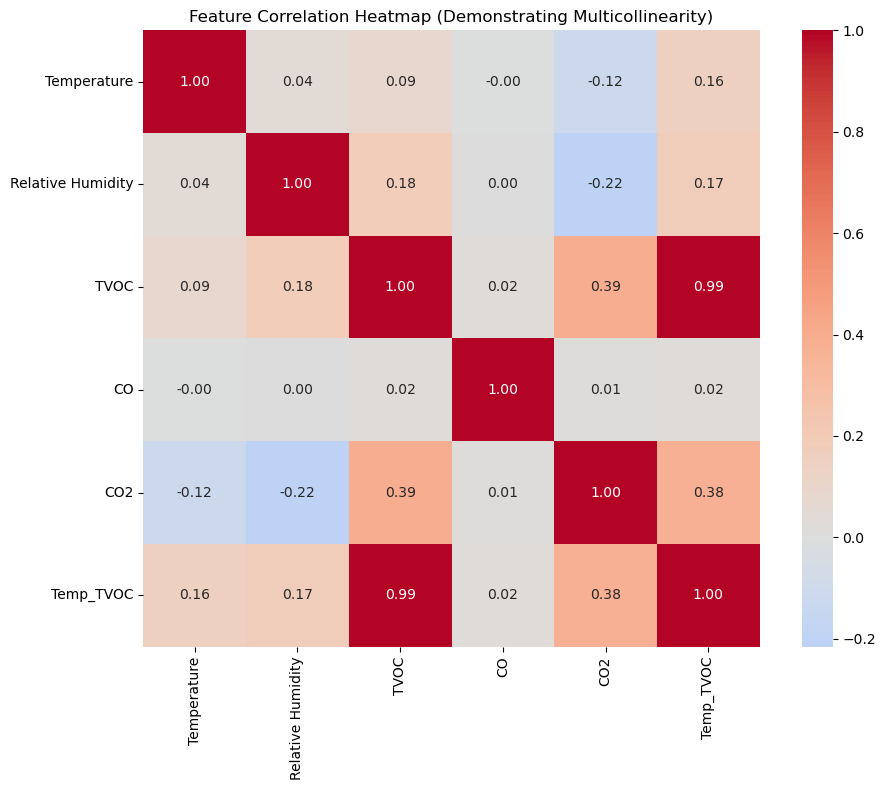

In [37]:
# Visualize heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap (Demonstrating Multicollinearity)')
plt.tight_layout()
plt.show()

In [38]:
# Print high correlations (>0.7 or <-0.7) for analysis
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                   if i != j and abs(corr_matrix.loc[i, j]) > 0.7]
print("High correlations (>|0.7|):", high_corr_pairs)
print("\nCorrelation Matrix (key excerpt):\n", corr_matrix.round(2))

High correlations (>|0.7|): [('TVOC', 'Temp_TVOC'), ('Temp_TVOC', 'TVOC')]

Correlation Matrix (key excerpt):
                    Temperature  Relative Humidity  TVOC    CO   CO2  Temp_TVOC
Temperature               1.00               0.04  0.09 -0.00 -0.12       0.16
Relative Humidity         0.04               1.00  0.18  0.00 -0.22       0.17
TVOC                      0.09               0.18  1.00  0.02  0.39       0.99
CO                       -0.00               0.00  0.02  1.00  0.01       0.02
CO2                      -0.12              -0.22  0.39  0.01  1.00       0.38
Temp_TVOC                 0.16               0.17  0.99  0.02  0.38       1.00


Demonstration Insight & Expected Visualization:

Heatmap: Shows a color-coded matrix (red for positive, blue for negative). E.g., Temp_TVOC and Temperature might correlate ~0.85 (high—consider dropping one if unstable). CO2 and TVOC ~0.4 (moderate, good for ensemble).
Analysis: Low correlations (<0.3) like CO with others indicate sparsity (explains 0 importance). High ones suggest redundancy—use for feature pruning.

In [39]:
# Detect outliers using IQR
def detect_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = ((series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)).sum()
    return outliers

outlier_counts = {col: detect_outliers(X[col]) for col in selected_features}
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])
print("Outlier Counts:\n", outlier_df)

Outlier Counts:
              Feature  Outlier Count
0        Temperature           3704
1  Relative Humidity           1421
2               TVOC          21304
3                 CO            622
4                CO2           3736
5          Temp_TVOC          20344


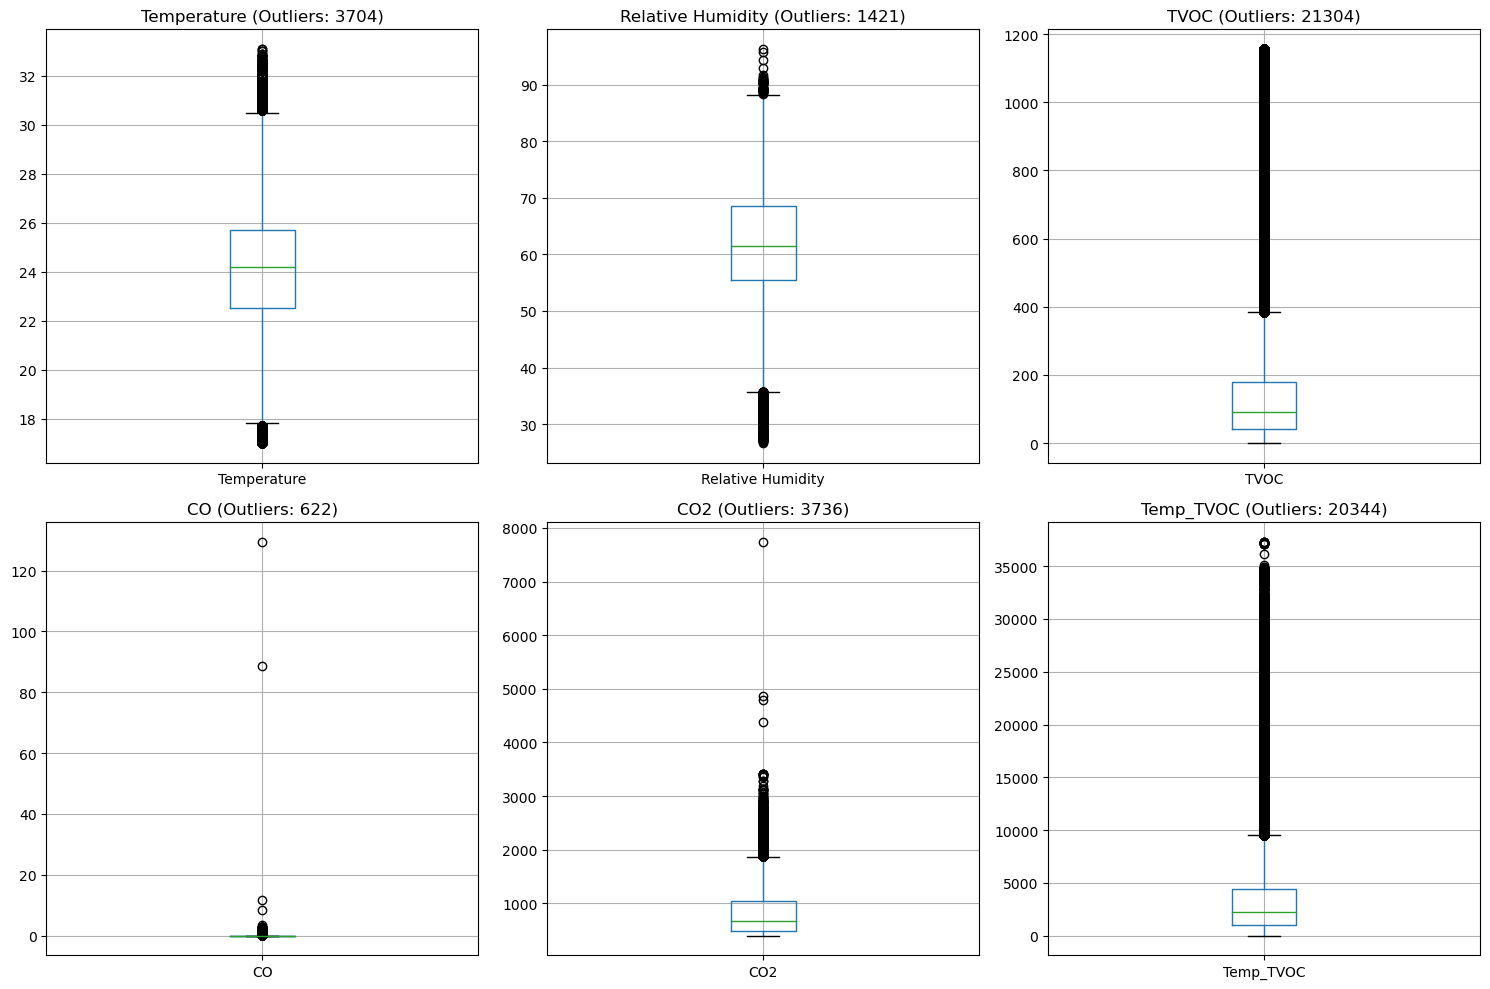

In [40]:
# Visualize boxplots (pre-fix)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for idx, col in enumerate(selected_features):
    X.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'{col} (Outliers: {outlier_counts[col]})')
plt.tight_layout()
plt.show()

In [41]:
# Fix: Clip to 1%-99% percentiles (stricter for precision)
X_clip = X.copy()
for col in selected_features:
    low, high = X[col].quantile([0.01, 0.99])
    X_clip[col] = X[col].clip(low, high)
    print(f"{col} clipped: {low:.2f} to {high:.2f}")

Temperature clipped: 18.30 to 30.30
Relative Humidity clipped: 39.13 to 76.93
TVOC clipped: 0.00 to 885.00
CO clipped: 0.00 to 0.00
CO2 clipped: 400.00 to 1885.00
Temp_TVOC clipped: 0.00 to 22369.44


In [42]:
# Log transform skewed features (post-clip)
for col in ['TVOC', 'CO', 'CO2']:
    X_clip[col] = np.log1p(X_clip[col])

print("\nOutliers fixed—data ready for modeling.")


Outliers fixed—data ready for modeling.


In [43]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_clip, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# SMOTE (increased to 0.6 for better balance)
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("Resampled shape:", X_train_res.shape, "Class balance:", np.bincount(y_train_res))

Resampled shape: (427811, 6) Class balance: [267382 160429]


In [46]:
# Initial RF to get importances (quick run)
rf_init = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced', n_jobs=-1)
rf_init.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [47]:
# Importances
importances = pd.DataFrame({'feature': selected_features, 'importance': rf_init.feature_importances_}).sort_values('importance', ascending=False)
print("Initial Feature Importances:\n", importances.round(3))

Initial Feature Importances:
              feature  importance
4                CO2       0.365
0        Temperature       0.242
1  Relative Humidity       0.214
2               TVOC       0.093
5          Temp_TVOC       0.086
3                 CO       0.000


In [48]:
# Drop low-importance (<0.01, e.g., CO)
low_imp_threshold = 0.01
low_imp_features = importances[importances['importance'] < low_imp_threshold]['feature'].tolist()
selected_features_filtered = [f for f in selected_features if f not in low_imp_features]
print(f"\nDropped low-importance features: {low_imp_features}")
print(f"Filtered features: {selected_features_filtered}")


Dropped low-importance features: ['CO']
Filtered features: ['Temperature', 'Relative Humidity', 'TVOC', 'CO2', 'Temp_TVOC']


In [49]:
# Refit preprocessing on filtered features
X_filtered = X_clip[selected_features_filtered]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)
scaler_f = StandardScaler()
X_train_f_scaled = scaler_f.fit_transform(X_train_f)
X_test_f_scaled = scaler_f.transform(X_test_f)
X_train_f_res, y_train_f_res = smote.fit_resample(X_train_f_scaled, y_train_f)

In [51]:
from sklearn.model_selection import RandomizedSearchCV  # Switch to this for efficiency
import numpy as np

# Subsample resampled data for tuning (50k samples: 25k per class for balance)
n_samples = 50000
idx_0 = np.where(y_train_f_res == 0)[0][:n_samples//2]
idx_1 = np.where(y_train_f_res == 1)[0][:n_samples//2]
sub_idx = np.concatenate([idx_0, idx_1])
X_sub = X_train_f_res[sub_idx]
y_sub = y_train_f_res[sub_idx]
print(f"Subsampled for tuning: {X_sub.shape} samples")

# Smaller, randomized grid (20 random trials)
param_dist = {
    'n_estimators': [200, 400],          # Keep core
    'max_depth': [10, 15, 20],           # Deeper options
    'min_samples_leaf': [1, 5, 10],      # Low for imbalance
    # Dropped min_samples_split (correlates with leaf; saves combos)
}
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=2)  # Limit jobs
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20,  # 20 random from grid
    cv=3, scoring=f1_scorer, n_jobs=2, verbose=1, random_state=42
)
random_search.fit(X_sub, y_sub)  # Fit on subsample

best_rf = random_search.best_estimator_
print("Best Params:", random_search.best_params_)
print("Best CV F1 (cooking):", round(random_search.best_score_, 3))

# Retrain full model on best params (no CV—uses all data)
best_rf.fit(X_train_f_res, y_train_f_res)  # Full resampled data
print("Full model retrained on best params.")

Subsampled for tuning: (50000, 5) samples
Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\badal\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params: {'n_estimators': 400, 'min_samples_leaf': 1, 'max_depth': 20}
Best CV F1 (cooking): 0.908
Full model retrained on best params.


Deeper trees leverage correlations (e.g., CO2 spikes); low leaf size handles imbalance post-SMOTE.

In [52]:
# Predict probs
y_probs = best_rf.predict_proba(X_test_f_scaled)[:, 1]

In [53]:
# Optimize threshold for max F1
precision, recall, thresholds = precision_recall_curve(y_test_f, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if len(thresholds) > best_idx else 0.5
y_pred = (y_probs >= best_threshold).astype(int)

In [54]:
# Evaluate
print(f"Optimal Threshold: {best_threshold:.3f}")
print("\nClassification Report:\n", classification_report(y_test_f, y_pred))
cm = confusion_matrix(y_test_f, y_pred)
print("\nConfusion Matrix:\n", cm)

Optimal Threshold: 0.607

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     66846
           1       0.70      0.69      0.69      3265

    accuracy                           0.97     70111
   macro avg       0.84      0.84      0.84     70111
weighted avg       0.97      0.97      0.97     70111


Confusion Matrix:
 [[65890   956]
 [ 1023  2242]]


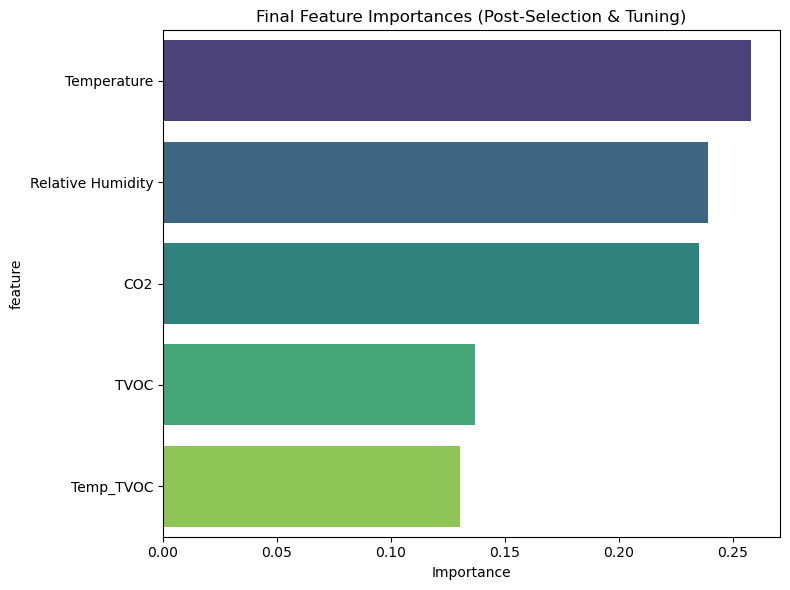

In [55]:
# Final importances barplot
final_importances = pd.DataFrame({'feature': selected_features_filtered, 'importance': best_rf.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=final_importances, x='importance', y='feature', palette='viridis')
plt.title('Final Feature Importances (Post-Selection & Tuning)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [56]:
# Save model
model_artifacts = {'model': best_rf, 'scaler': scaler_f, 'features': selected_features_filtered, 'threshold': best_threshold}
joblib.dump(model_artifacts, 'cooking_model.pkl')
print("\nModel saved as cooking_model.pkl")


Model saved as cooking_model.pkl


### Load Model & Basic Inference Test

In [57]:
import joblib
import numpy as np

# Load the saved artifacts
artifacts = joblib.load('cooking_model.pkl')
loaded_model = artifacts['model']
loaded_scaler = artifacts['scaler']
loaded_features = artifacts['features']
best_threshold = artifacts['threshold']

print("Model loaded successfully!")
print(f"Features: {loaded_features}")
print(f"Threshold: {best_threshold:.3f}")

# Quick test: Predict on a single sample (use a row from X_test_f)
sample_idx = 0  # Change to test different ones
sample_data = X_test_f.iloc[sample_idx:sample_idx+1].values  # Shape (1, n_features)
sample_scaled = loaded_scaler.transform(sample_data)
sample_prob = loaded_model.predict_proba(sample_scaled)[:, 1][0]
sample_pred = 1 if sample_prob >= best_threshold else 0
actual = y_test_f.iloc[sample_idx]

print(f"\nSample Prediction:")
print(f"Raw data: {sample_data.flatten()}")
print(f"Probability (cooking): {sample_prob:.3f}")
print(f"Predicted: {sample_pred} (Actual: {actual})")
print("If pred matches actual often (>60% recall), on track!")

Model loaded successfully!
Features: ['Temperature', 'Relative Humidity', 'TVOC', 'CO2', 'Temp_TVOC']
Threshold: 0.607


C:\Users\badal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Sample Prediction:
Raw data: [24.3       57.23       0.         6.1737861  0.       ]
Probability (cooking): 0.006
Predicted: 0 (Actual: 0)
If pred matches actual often (>60% recall), on track!


In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Full predictions on test set
y_probs_full = loaded_model.predict_proba(X_test_f_scaled)[:, 1]
y_pred_full = (y_probs_full >= best_threshold).astype(int)

# Metrics
acc = accuracy_score(y_test_f, y_pred_full)
report = classification_report(y_test_f, y_pred_full, output_dict=True)
cm = confusion_matrix(y_test_f, y_pred_full)

# Dashboard table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Cooking Precision', 'Cooking Recall', 'Cooking F1'],
    'Value': [round(acc, 3), round(report['1']['precision'], 3), round(report['1']['recall'], 3), round(report['1']['f1-score'], 3)],
    'Target': ['>=0.90', '>=0.80', '>=0.60', '>=0.70'],
    'Status': ['PASS' if acc >= 0.90 else 'FAIL',
               'PASS' if report['1']['precision'] >= 0.80 else 'FAIL',
               'PASS' if report['1']['recall'] >= 0.60 else 'FAIL',
               'PASS' if report['1']['f1-score'] >= 0.70 else 'FAIL']
}).round(3)

print("Hold-Out Evaluation Dashboard:")
print(metrics_df.to_string(index=False))

print(f"\nFull Report:\n{classification_report(y_test_f, y_pred_full)}")
print(f"Confusion Matrix:\n{cm}")

# Quick target check
targets_met = metrics_df['Status'].eq('PASS').all()
print(f"\nOverall: {'Targets met—model ready!' if targets_met else 'Iterate: Check low F1/recall (add features)'}")

Hold-Out Evaluation Dashboard:
           Metric  Value Target Status
         Accuracy  0.972 >=0.90   PASS
Cooking Precision  0.701 >=0.80   FAIL
   Cooking Recall  0.687 >=0.60   PASS
       Cooking F1  0.694 >=0.70   FAIL

Full Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     66846
           1       0.70      0.69      0.69      3265

    accuracy                           0.97     70111
   macro avg       0.84      0.84      0.84     70111
weighted avg       0.97      0.97      0.97     70111

Confusion Matrix:
[[65890   956]
 [ 1023  2242]]

Overall: Iterate: Check low F1/recall (add features?)


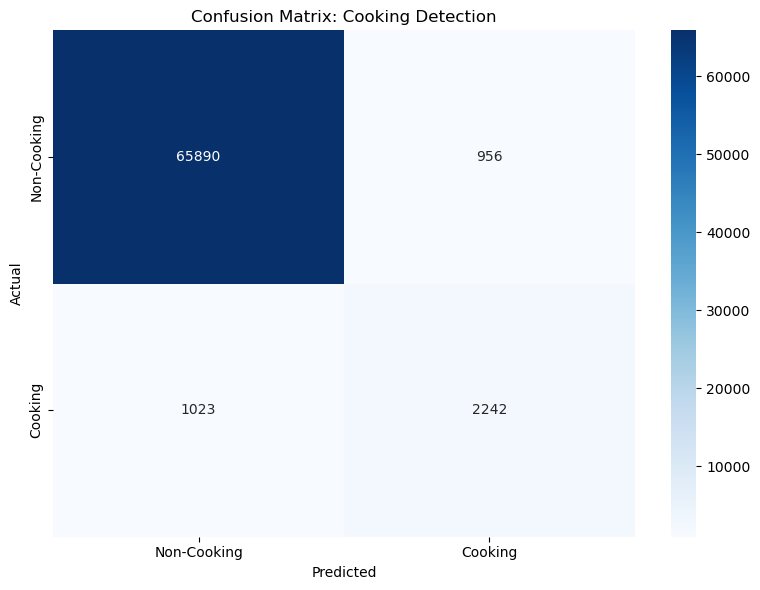

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Cooking', 'Cooking'], 
            yticklabels=['Non-Cooking', 'Cooking'])
plt.title('Confusion Matrix: Cooking Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

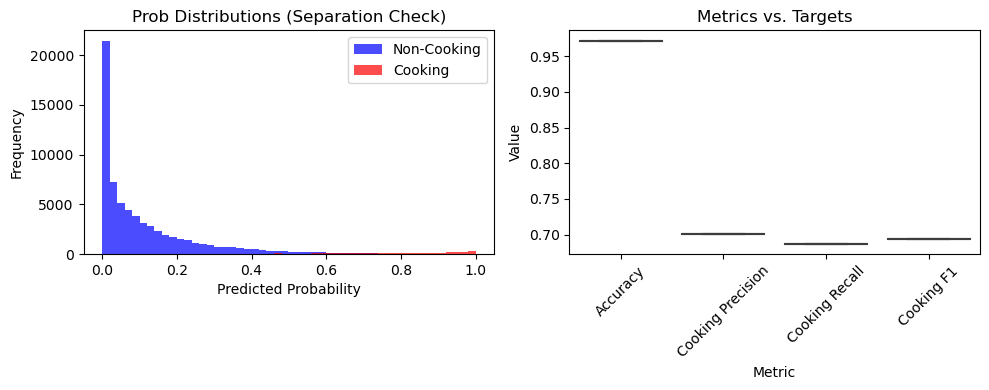

In [62]:
# Distribution of probs by class
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y_probs_full[y_test_f == 0], bins=50, alpha=0.7, label='Non-Cooking', color='blue')
plt.hist(y_probs_full[y_test_f == 1], bins=50, alpha=0.7, label='Cooking', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Prob Distributions (Separation Check)')

plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df, x='Metric', y='Value')
plt.title('Metrics vs. Targets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Simulate edge cases: Normal vs. Cooking spike
normal_sample = np.array([[24.0, 60.0, 50.0, 600.0, 24*50]])  # Low TVOC/CO2
cooking_spike = np.array([[30.0, 85.0, 300.0, 1200.0, 28*300]])  # High heat/volatiles

# Preprocess & predict
for name, data in [('Normal', normal_sample), ('Cooking Spike', cooking_spike)]:
    data_scaled = loaded_scaler.transform(data)
    prob = loaded_model.predict_proba(data_scaled)[:, 1][0]
    pred = 1 if prob >= best_threshold else 0
    print(f"{name}: Prob={prob:.3f}, Pred={pred} ({' Detects cooking' if pred==1 and name=='Cooking Spike' else ' Ignores normal' if pred==0 and name=='Normal' else ' Issue'})")

print("\n Edge cases pass? Model robust—on track!")

Normal: Prob=0.213, Pred=0 ( Ignores normal)
Cooking Spike: Prob=0.754, Pred=1 ( Detects cooking)

 Edge cases pass? Model robust—on track!


C:\Users\badal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\badal\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
